# 분류 실습 : 캐글 신용카드 사기 검출

Kaggle의 신용카드 데이터 세트를 이용해 신용카드 사기 검출 분류 실습  
데이터 다운로드 : www.kaggle.com에서 검색  
credit card fraud

신용카드 데이터 세트 특징
- 2013년 European Card 사용 트랜잭션을 가공해서 생성
- 불균형(Imbalanced)되어 있는 데이터 셋 284,807건의 데이터 중 492건이 Fraud(사기)

레이블인 Class 속성이 매우 불균형한 분포
- 0 값 : 정상 트랜잭선
- 1 값 : 사기 트랜잭션 (0.172 %)
    
일반적인 사기 검출(Fraud Detection)이나 이상 검출(Anomaly Detection)과 같은 데이터 세트는  
레이블 값이 극도로 불균형한 분포를 이룸  
사기와 같은 이상 현상은 전체 데이터에서 차지하는 비중이 매우 적기 때문


Credit Card Falut Detection ML 모델 구축
- 다양한 Feature Engineering 방식을 
- Logistic Regression과 LightGBM 방식을 이용하여 
- 각 방식에 적용 후 평가 비교

Feature Engineering 
- 피처들 중 어떤 것이 모델링할 때 중요한 것인지 결정하는 과정
- 모델 성능에 미치는 영향이 크기 때문에 머신러닝 응용에 있어서 굉장히 중요한 단계이며
- 전문성과 시간과 비용이 많이 드는 작업
- PCA 방식 사용

PCA(Principal Component Analysis) : 주성분 분석
- 대표적인 차원 축소 알고리즘
- 여러 변수 간 존재하는 상관관계를 이용해 
- 대표하는 주성분을 추출해서 차원을 축소하는 기법
- 간단하게 가장 높은 분산을 가지는 데이터의 축을 찾아 차원을 축소

차원 축소
- 많은 피처로 구성된 다차원의 데이터 셋을
- 차원을 축소하여 새로원 차원의 데이터 세트를 생성하는 것

Feature Engineering 주요 작업
- 주요 Feature의 데이터 분포도 변경
    - Log 변환
- 이상치(Outlier) 제거
- SMOTE 오버 샘플링

IQR(Inter Quantile Range)를 이용한 이상치 제거
- 4 분위수(Quantile)로 나눔 
- IQR을 이용한 이상치 추출 방법
- IQR을 잘 나타내는 게 BOXPLOT
- 최소값과 최대값  넘어가는 것을 이상치로 판별
- 최대값 : 3분위수 + 1.5 * IQR
- 최소값 : 1분위수 - 1.5 * IQR    

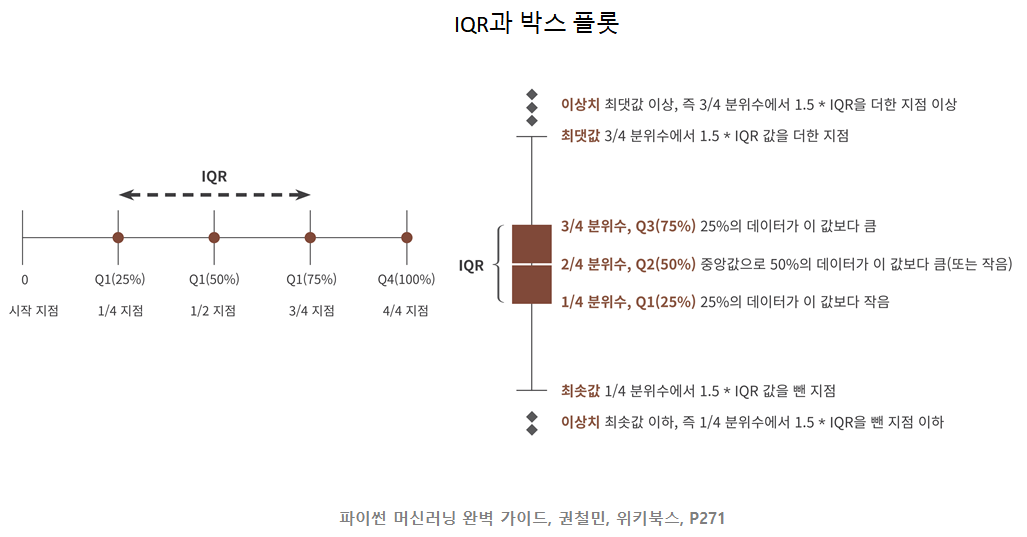

### 언더 샘플링과 오버 샘플링
- **레이블**이 불균형한 분포를 가진 데이터 세트를 학습 시 예측 성능의 문제 발생
- 이상 레이블을 가지는 데이터 건수가 정상 레이블을 가진 데이터 건수에 비해 너무 적어
- 다양한 유형을 학습하지 못하고 일방적으로 너무 많은 정상 레이블로 치우친 학습을 수행하기 때문에
- 제대로 된 이상 데이터 검출이 어려움

지도학습에서 극도로 불균형항 레이블 값 분포로 인한 문제점을 해결하기 위해서는   
적절한 양의 학습 데이터를 확보해야 함  
대표적으로 오버 샘플링과 언더 샌플링 방법 사용  
오버 샘플링 방식이 예측 성능상 더 유리한 경우가 많아 주로 사용

언더 샘플링
- 많은 레이블을 가진 데이터 세트를 적은 데이터 세트 수준으로 감소시키는 방식
- 너무 많은 정상 레이블을 데이터를 감소시키기 때문에
- 정상 레이블의 경우 제대로 된 학습을 수행할 수 없다는 단점이 있어
- 잘 적용하지 않음

오버 샘플링
- 적은 레이블을 가진 데이터 세트를 많은 데이터 세트 수준으로 증식시키는 방식
- 학습을 위한 충분한 데이터 확보
- 그러나 동일한 데이터를 단순히 증식하는 방법은 과적합이 되기 때문에 의미 없고
- 원본 데이터의 피처 값들을 약간만 변경하여 증식
- 대표적인 방법이 SMOTE

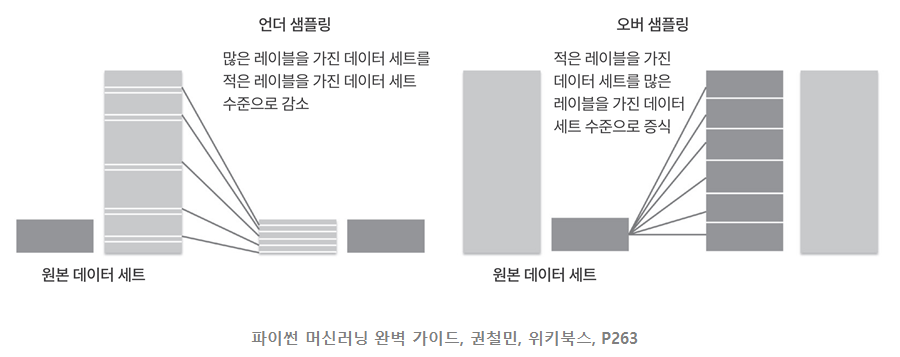

SMOTE(Synthetic Minority Over-sample Technique)
- 적은 데이터 세트에 있는 개별 데이터들의 
- K 최근접 이웃(K Nearest Neighbor)을 찾아서
- K개 이웃들과의 차이를 일정 값으로 만들어서
- 기존 데이터와 약간 차이가 나는 새로운 데이터 생성 방식

SMOTE 수행 절차

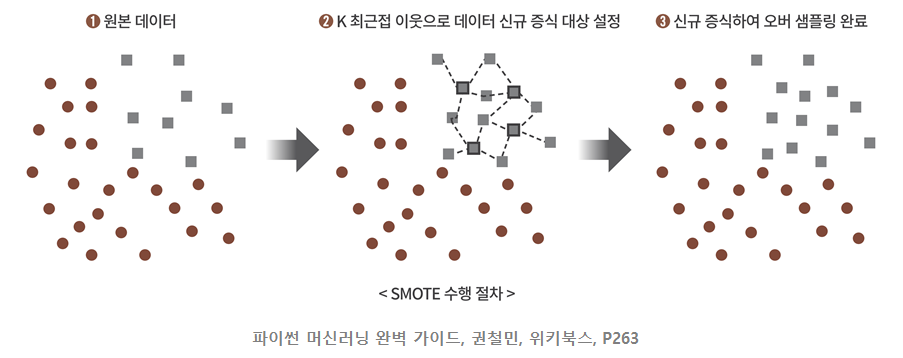

### 신용카드 사기 검출 예제 
- LogisticRegression 모델 생성 학습/예측/평가 수행  
- LightGBM 모델 생성 학습/예측/평가 
- Amount를 로그 변환 후 모델 학습/예측/평가 
- 이상치 데이터 제거 후 모델 학습/예측/평가
- SMOTE 오버 샘플링 적용 
  - 로지스틱 회귀로 학습/예측/평가
  - LightGBM 모델 적용 학습/예측/평가  
---  
- 모델/학습/예측 평가 반복 수행할 수 있도록 함수로 작성  

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

### 데이터 준비

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('../data/creditcard.csv')
card_df.head(3)

# Time : 크게 의미 있는 칼럼은 아님 데이터 만드는데 걸리는 시간 - 나중에 삭제
# v1~v28 속성 : 피처 이름이 전혀 들어가 있지 않음
# kaggle에서 칼럼 확인해보면
# 민감한 정보를 보호하기 위해서 PCA로 압축한 속성
# Amount : 카드 사용액
# Class : 0은 정상 사용, 1은 부정 카드 사용

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
card_df.shape
# 284807 레코드
# 31 피처와 타겟

(284807, 31)

In [4]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
card_df['Class'].value_counts()
# 1 : 사기 :총 284,315 건 중에서 492만 사기 
# 레이블 값 상당히 불균형 함

Class
0    284315
1       492
Name: count, dtype: int64

In [6]:
# Time 삭제 후 원본 복사해서 사용
card_df.drop('Time', axis=1, inplace=True)
df_copy = card_df.copy()

### 데이터 세트 분리 함수 /  성능 평가 함수 사용

#### 데이터 세트 분리 함수  

In [8]:
from sklearn.model_selection import train_test_split

# 분리된 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df_copy):
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1] # 피처 : 마지막 칼럼 전까지
    y_target = df_copy.iloc[:, -1] # 레이블 : 마지막 칼럼
    
    # 데이터 세트 분리
    X_train, X_test, y_train, y_test = train_test_split(X_features, 
                                                        y_target, 
                                                        test_size=0.3, 
                                                        random_state=0, 
                                                        stratify=y_target)
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = get_train_test_dataset(df_copy)

print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
Class
0    99.827451
1     0.172549
Name: count, dtype: float64
테스트 데이터 레이블 값 비율
Class
0    99.826785
1     0.173215
Name: count, dtype: float64


In [12]:
y_train.value_counts(normalize=True) * 100

Class
0    99.827451
1     0.172549
Name: proportion, dtype: float64

#### 예측 모델 평가 수행 및 평가 지표 출력하는 함수

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score


# 예측 모델 평가 수행 및 평가 지표 출력하는 함수  앞에서 복사할 것)
def get_clf_eval(y_test, y_pred, pred_proba) :
    cm = confusion_matrix(y_test, y_pred) # 혼동행렬(오차행렬)
    accuracy = accuracy_score(y_test, y_pred) # 정확도
    precision = precision_score(y_test, y_pred) # 정밀도
    recall = recall_score(y_test, y_pred)# 재현율
    f1 = f1_score(y_test, y_pred) # F1 스코어
    roc_auc = roc_auc_score(y_test, pred_proba) # ROC_AUC 스코어
    
    # 출력 
    # 오차행렬
    print("오차행렬 : ", cm)
    # 정확도, 정밀도, 재현율, F1
    print(f"정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, F1 Score: {f1:.4f}, ROC_AUC : {roc_auc:.4f}")

### LogisticRegression  학습/예측/평가 수행

In [14]:
from sklearn.linear_model import LogisticRegression

# 데이터 세트 분리 함수 호출
X_train, X_test, y_train, y_test = get_train_test_dataset(df_copy)

# 모델 생성
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)

# 현재 사기 검출 모델링에서는 재현율이 중요시 되는 경우인데
# 다른 평가 지표에 비해 재현율이 낮은 편 : 0.6081
# 재현율이 낮아서 예측 모델로서 만족스럽지 못함 
# 정확도: 0.9991, 정밀도: 0.8257, 재현율: 0.6081, F1 Score: 0.7004, ROC_AUC : 0.9495

LogisticRegression()

오차행렬 :  [[85276    19]
 [   58    90]]
정확도: 0.9991, 정밀도: 0.8257, 재현율: 0.6081, F1 Score: 0.7004, ROC_AUC : 0.9495


### LightGBM으로 학습/예측/평가 수행
- boost_from_average (True가 디폴트)
  - True일 경우 전반적으로 좋은데   
  - 레이블 값이 극도로 불균형 분포를 이루는 경우 재현률 및 ROC-AUC 성능이 매우 저하됨
  - (LightGBM 2.1.0 이상 버전에서 이와 같은 현상 발생)
  - 현재 데이터는 불균형이 심하므로 False로 설정  
  - early_stopping 설정한 경우 달라짐  

In [17]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

# 모델 생성
lgbm_clf = LGBMClassifier(n_estimators=400, 
#                           boost_from_average=False,
                          force_col_wise=True) # , force_col_wise=True

eval_data = [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, 
            callbacks=[early_stopping(100), log_evaluation()],
            eval_metric='logloss', 
            eval_set=eval_data)

y_pred = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)


# (1) boost_from_average=True이고 early_stopping 설정하지 않은 경우
# 재현율이 현저하게 낮게 나옴 
#정확도: 0.9987, 정밀도: 0.6341, 재현율: 0.5270, F1 Score: 0.5756, ROC_AUC : 0.7666

# (2) boost_from_average=True이고 early_stopping 설정한 경우
# 정확도: 0.9988, 정밀도: 0.6284, 재현율: 0.7770, F1 Score: 0.6949, ROC_AUC : 0.8975

# (3) boost_from_average=False이고 early_stopping 설정한 경우                    
# 정확도: 0.9995, 정밀도: 0.9474, 재현율: 0.7297, F1 Score: 0.8244, ROC_AUC : 0.9775

# LightGBM이 로지스틱 회귀보다 재현율이 높게 나왔지만
# 좀 더 좋아질 수 있는 요소들을 확인해 볼 것임

[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001725 -> initscore=-6.360519
[LightGBM] [Info] Start training from score -6.360519
[1]	valid_0's binary_logloss: 0.013034
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.040283
[3]	valid_0's binary_logloss: 0.0196155
[4]	valid_0's binary_logloss: 0.0210264
[5]	valid_0's binary_logloss: 0.0227629
[6]	valid_0's binary_logloss: 0.021869
[7]	valid_0's binary_logloss: 0.0224176
[8]	valid_0's binary_logloss: 0.0287507
[9]	valid_0's binary_logloss: 0.0275914
[10]	valid_0's binary_logloss: 0.0293091
[11]	valid_0's binary_logloss: 0.0315712
[12]	valid_0's binary_logloss: 0.0318268
[13]	valid_0's binary_logloss: 0.0326604
[14]	valid_0's binary_logloss: 0.0383157
[15]	valid_0's binary_logloss: 0.0346403
[16

LGBMClassifier(force_col_wise=True, n_estimators=400)

오차행렬 :  [[85227    68]
 [   33   115]]
정확도: 0.9988, 정밀도: 0.6284, 재현율: 0.7770, F1 Score: 0.6949, ROC_AUC : 0.8975


### 중요 데이터 분포도 변환 후 모델 학습/예측/평가


- Amount 피처는 신용 카드 사용 금액으로 
- 정상/사기 트랜잭션을 결정하는 중요 속성일 가능성 높음 
- 다른 피처들은 PCA 압축한 속성  


In [18]:
card_df['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

<Figure size 800x400 with 0 Axes>

([<matplotlib.axis.XTick at 0x20c4ec27810>,
 [Text(0, 0, '0'),
  Text(1000, 0, '1000'),
  Text(2000, 0, '2000'),
  Text(3000, 0, '3000'),
  Text(4000, 0, '4000'),
  Text(5000, 0, '5000'),
  Text(6000, 0, '6000'),
  Text(7000, 0, '7000'),
  Text(8000, 0, '8000'),
  Text(9000, 0, '9000'),
  Text(10000, 0, '10000'),
  Text(11000, 0, '11000'),
  Text(12000, 0, '12000'),
  Text(13000, 0, '13000'),
  Text(14000, 0, '14000'),
  Text(15000, 0, '15000'),
  Text(16000, 0, '16000'),
  Text(17000, 0, '17000'),
  Text(18000, 0, '18000'),
  Text(19000, 0, '19000'),
  Text(20000, 0, '20000'),
  Text(21000, 0, '21000'),
  Text(22000, 0, '22000'),
  Text(23000, 0, '23000'),
  Text(24000, 0, '24000'),
  Text(25000, 0, '25000'),
  Text(26000, 0, '26000'),
  Text(27000, 0, '27000'),
  Text(28000, 0, '28000'),
  Text(29000, 0, '29000')])

<Axes: xlabel='Amount', ylabel='Density'>

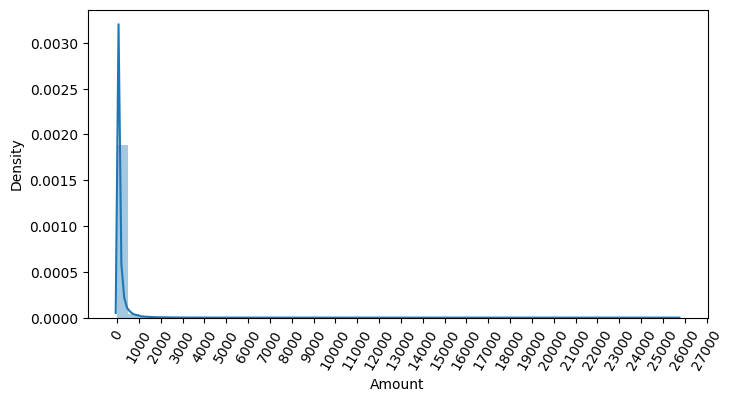

In [19]:
# 중요 속성으로 Amount 선정해서 분포도 확인

import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

# 대부분 금액이 500 유로 미만 정도 되는데
# 나머지 작은 값들이 26,000 가까이까지 존재
# 상당히 불균형하게 치우져 있음

####  Amount 피처에 표준 스케일링 적용

In [20]:
from sklearn.preprocessing import StandardScaler

df_copy = card_df.copy()
scaler = StandardScaler()
amount_sc = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))

# 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
df_copy.insert(0, 'Amount_Scaled', amount_sc)

In [23]:
df_copy.head(3)

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.244964,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,-0.342475,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.160686,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### Amount 값 스케일링 후 모델 학습/예측/평가

In [21]:
# 로지스틱 회귀 


print('로지스틱 회귀 예측 성능')
# 데이터 세트 분리 함수 호출
X_train, X_test, y_train, y_test = get_train_test_dataset(df_copy)

# 모델 생성
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)

# 스케일링 적용 전
# 정확도: 0.9991, 정밀도: 0.8257, 재현율: 0.6081, F1 Score: 0.7004, ROC_AUC : 0.9495

# 스케일링 적용 후
# 정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1 Score: 0.7120, ROC_AUC : 0.9645

# 스케일링 적용 전/후 별 차이 없음 (약간약간 )

로지스틱 회귀 예측 성능


LogisticRegression()

오차행렬 :  [[85282    13]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1 Score: 0.7120, ROC_AUC : 0.9645


In [22]:
# LightGBM 수행. 
print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=400, 
                          boost_from_average=False,
                          force_col_wise=True) # , force_col_wise=True

eval_data = [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, 
            callbacks=[early_stopping(100), log_evaluation()],
            eval_metric='logloss', 
            eval_set=eval_data)

y_pred = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)


# 스케일링 적용 전
# 정확도: 0.9995, 정밀도: 0.9474, 재현율: 0.7297, F1 Score: 0.8244, ROC_AUC : 0.9775

# 스케일링 적용 후
# 정확도: 0.9995, 정밀도: 0.9478, 재현율: 0.7365, F1 Score: 0.8289, ROC_AUC : 0.9662

# 스케일링 적용 전/후 별 차이 없음 (오히려 재현율이 약간 낮아짐)

LightGBM 예측 성능
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[1]	valid_0's binary_logloss: 0.598339
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.520683
[3]	valid_0's binary_logloss: 0.455937
[4]	valid_0's binary_logloss: 0.401211
[5]	valid_0's binary_logloss: 0.354468
[6]	valid_0's binary_logloss: 0.314201
[7]	valid_0's binary_logloss: 0.279285
[8]	valid_0's binary_logloss: 0.248826
[9]	valid_0's binary_logloss: 0.222144
[10]	valid_0's binary_logloss: 0.198676
[11]	valid_0's binary_logloss: 0.177949
[12]	valid_0's binary_logloss: 0.159616
[13]	valid_0's binary_logloss: 0.143338
[14]	valid_0's binary_logloss: 0.128857
[15]	valid_0's binary_logloss: 0.115958
[16]	valid_0's binary_logloss: 0.104447
[17]	valid_0's binary_logloss: 0.0941609
[18]	valid_0's binary_logloss: 0.0849577
[19]	valid_0

LGBMClassifier(boost_from_average=False, force_col_wise=True, n_estimators=400)

오차행렬 :  [[85289     6]
 [   39   109]]
정확도: 0.9995, 정밀도: 0.9478, 재현율: 0.7365, F1 Score: 0.8289, ROC_AUC : 0.9662


#### Amount를 로그 변환 

In [23]:
df_copy = card_df.copy()
amount_log = np.log1p(df_copy['Amount'])

# 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
df_copy.insert(0, 'Amount_Log', amount_log)

In [24]:
df_copy.head(3)

,Amount_Log,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,5.014760,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.305626,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,5.939276,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


### 로그변환 후 모델링 

In [25]:
# 로지스틱 회귀 

print('로지스틱 회귀 예측 성능')
# 데이터 세트 분리 함수 호출
X_train, X_test, y_train, y_test = get_train_test_dataset(df_copy)

# 모델 생성
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)

# 로그 변환 전
# 스케일링 적용 전
# 정확도: 0.9991, 정밀도: 0.8257, 재현율: 0.6081, F1 Score: 0.7004, ROC_AUC : 0.9495

# 스케일링 적용 후
# 정확도: 0.9992, 정밀도: 0.8725, 재현율: 0.6014, F1 Score: 0.7120, ROC_AUC : 0.9645

# 로그 변환 후
# 정확도: 0.9991, 정밀도: 0.8505, 재현율: 0.6149, F1 Score: 0.7137, ROC_AUC : 0.9211

# 로그 변환 후 재현율의 약간 상승했지만 별 차이 없음 


로지스틱 회귀 예측 성능


LogisticRegression()

오차행렬 :  [[85279    16]
 [   57    91]]
정확도: 0.9991, 정밀도: 0.8505, 재현율: 0.6149, F1 Score: 0.7137, ROC_AUC : 0.9211


In [26]:
# LightGBM 수행. 
print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=400, 
                          boost_from_average=False,
                          force_col_wise=True) # , force_col_wise=True

eval_data = [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, 
            callbacks=[early_stopping(100), log_evaluation()],
            eval_metric='logloss', 
            eval_set=eval_data)

y_pred = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)


# 로그 변환 전
# 스케일링 적용 전
# 정확도: 0.9995, 정밀도: 0.9474, 재현율: 0.7297, F1 Score: 0.8244, ROC_AUC : 0.9775

# 스케일링 적용 후
# 정확도: 0.9995, 정밀도: 0.9478, 재현율: 0.7365, F1 Score: 0.8289, ROC_AUC : 0.9662


# 로그 변환 후
# 정확도: 0.9995, 정밀도: 0.9474, 재현율: 0.7297, F1 Score: 0.8244, ROC_AUC : 0.9775

LightGBM 예측 성능
[LightGBM] [Info] Number of positive: 344, number of negative: 199020
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199364, number of used features: 30
[1]	valid_0's binary_logloss: 0.598339
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.520683
[3]	valid_0's binary_logloss: 0.455937
[4]	valid_0's binary_logloss: 0.401211
[5]	valid_0's binary_logloss: 0.354468
[6]	valid_0's binary_logloss: 0.314201
[7]	valid_0's binary_logloss: 0.279285
[8]	valid_0's binary_logloss: 0.248826
[9]	valid_0's binary_logloss: 0.222143
[10]	valid_0's binary_logloss: 0.198676
[11]	valid_0's binary_logloss: 0.17795
[12]	valid_0's binary_logloss: 0.159617
[13]	valid_0's binary_logloss: 0.14334
[14]	valid_0's binary_logloss: 0.128859
[15]	valid_0's binary_logloss: 0.115959
[16]	valid_0's binary_logloss: 0.104448
[17]	valid_0's binary_logloss: 0.0941632
[18]	valid_0's binary_logloss: 0.0849599
[19]	valid_0's

LGBMClassifier(boost_from_average=False, force_col_wise=True, n_estimators=400)

오차행렬 :  [[85289     6]
 [   40   108]]
정확도: 0.9995, 정밀도: 0.9474, 재현율: 0.7297, F1 Score: 0.8244, ROC_AUC : 0.9775


### 이상치 데이터 제거 후 모델 학습/예측/평가

- 각 피처들의 상관 관계를 시각화
- 결정 레이블인 class 값과 가장 상관도가 높은 피처 추출 
- 상관도가 높은 피저들에 대해서 아웃 라이어(이상치) 찾아서    
- 이상치가 높은 피처들의 행 삭제  

<Figure size 1000x1000 with 0 Axes>

<Axes: >

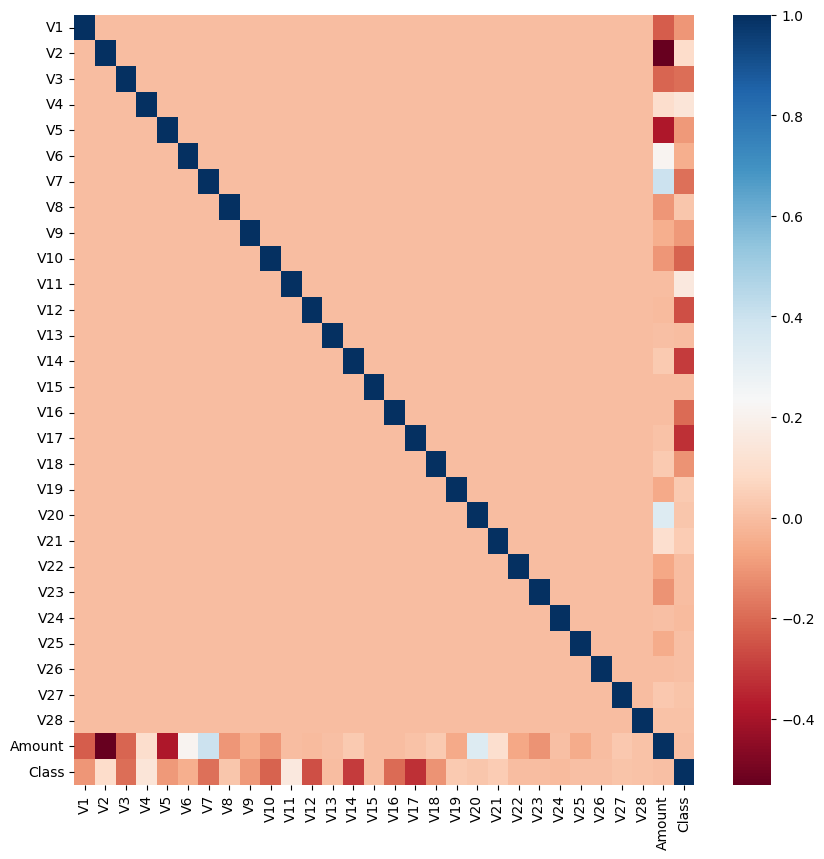

In [27]:
import seaborn as sns

plt.figure(figsize=(10, 10))
corr = card_df.corr() # 각 칼럼들의 상관도 값 반환
sns.heatmap(corr, cmap='RdBu') 

# 상관관계를 직관적으로 이해할 수 있도록 히트맵으로 시각화
# 오른쪽 막대 색상 : 위쪽 파란색이 짙어질수록 양의 상관관계가 높음 (1)
# 아래쪽 빨간색으로 짙어질수록 음의 상관관계가 높아짐(-1)

# Class 값과 상곤도가 높은 피처를 찾아서 확인 : X축에서 v12, v14, v17 (짙은 빨간색)
# 이 중에서 v14에 해당되는 이상치를 찾아 확인해 볼 것 

### IQR을 이용해 이상치 데이터 검출
- IQR*1.5해서 최대값과 최소값 결정
- 이상치 : 최대값 초과 또는 최소값 미만 데이터    

In [28]:
# 이상치를 찾기 위한 함수 새로 생성

import numpy as np

# 전체 데이터에서 찾지 않고 사기 데이터 (Class가 1인)에서 찾음
def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column] # column 값으로 V14 들어올 것임
    quantile_25 = np.percentile(fraud.values, 25) # 1분위수
    quantile_75 = np.percentile(fraud.values, 75) # 3분위수
    
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25   

    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 데이터 프레임 인덱스 찾음
    # 최대값 보다 크거나, 최소값 보다 작은 값을 이상치로 설정하고 DataFrame index 반환 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    
    return outlier_index
    

In [29]:
np.percentile(card_df['V14'], 25) # 1분위수

-0.4255740124549935

In [30]:
np.percentile(card_df['V14'], 75) # 3분위수 : 상위 75%

0.493149849218149

In [31]:
#np.percentile(card_df['V14'].values, 100) 
np.max(card_df['V14'])

10.5267660517847

In [32]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)
# 4개 인덱스 : 이 인덱스에 해당되는 행은 삭제할 것임

이상치 데이터 인덱스: Index([8296, 8615, 9035, 9252], dtype='int64')


In [35]:
# 참고 
get_outlier(df=card_df, column='V17', weight=1.5)
get_outlier(df=card_df, column='V12', weight=1.5)

Index([], dtype='int64')

Index([8296, 8615, 150601, 150644, 150647, 150654], dtype='int64')

**로그 변환 후 V14 피처의 이상치 데이터를 삭제한 뒤 모델들을 재 학습/예측/평가**

In [36]:
df_copy = card_df.copy()

# 로그변환 
amount = np.log1p(df_copy['Amount'])
df_copy.insert(0, 'Amount_log', amount)

# 이상치 데이터 삭제
outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
df_copy.drop(outlier_index, axis=0, inplace=True)     
df_copy.head(3)

,Amount_log,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,5.014760,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.305626,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,5.939276,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [37]:
# 로지스틱 회귀 

print('로지스틱 회귀 예측 성능')
# 데이터 세트 분리 함수 호출
X_train, X_test, y_train, y_test = get_train_test_dataset(df_copy)

# 모델 생성
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)

# 로그변환/이상치 제거 전
# 정확도: 0.9991, 정밀도: 0.8505, 재현율: 0.6149, F1 Score: 0.7137, ROC_AUC : 0.9211

# 로그변환/이상치 제거 후
# 정확도: 0.9993, 정밀도: 0.8850, 재현율: 0.6849, F1 Score: 0.7722, ROC_AUC : 0.9590

# 전체적으로 수치 올랐고
# 정밀도는 약간, 재현율은 꽤 향상되었음 (0.6149 -> 0.6849)

로지스틱 회귀 예측 성능


LogisticRegression()

오차행렬 :  [[85282    13]
 [   46   100]]
정확도: 0.9993, 정밀도: 0.8850, 재현율: 0.6849, F1 Score: 0.7722, ROC_AUC : 0.9590


In [38]:
# LightGBM 수행. 
print('LightGBM 예측 성능')
lgbm_clf = LGBMClassifier(n_estimators=400, 
                          boost_from_average=False,
                          force_col_wise=True) # , force_col_wise=True

eval_data = [(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, 
            callbacks=[early_stopping(100), log_evaluation()],
            eval_metric='logloss', 
            eval_set=eval_data)

y_pred = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

get_clf_eval(y_test, y_pred, pred_proba)


# 로그변환/이상치 제거 전
# 정확도: 0.9995, 정밀도: 0.9474, 재현율: 0.7297, F1 Score: 0.8244, ROC_AUC : 0.9775

# 로그변환/이상치 제거 후
# 정확도: 0.9996, 정밀도: 0.9360, 재현율: 0.8014, F1 Score: 0.8635, ROC_AUC : 0.9736

# 정밀도는 약간 수치가 내려갔지만
# 재현율은 꽤 향상되어서 80% 넘는 수치가 나왔음 (0.7297 -> 0.8014)

LightGBM 예측 성능
[LightGBM] [Info] Number of positive: 342, number of negative: 199020
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 199362, number of used features: 30
[1]	valid_0's binary_logloss: 0.598311
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.520649
[3]	valid_0's binary_logloss: 0.455898
[4]	valid_0's binary_logloss: 0.401157
[5]	valid_0's binary_logloss: 0.354397
[6]	valid_0's binary_logloss: 0.314118
[7]	valid_0's binary_logloss: 0.27918
[8]	valid_0's binary_logloss: 0.248711
[9]	valid_0's binary_logloss: 0.222018
[10]	valid_0's binary_logloss: 0.198531
[11]	valid_0's binary_logloss: 0.177809
[12]	valid_0's binary_logloss: 0.159452
[13]	valid_0's binary_logloss: 0.143161
[14]	valid_0's binary_logloss: 0.128674
[15]	valid_0's binary_logloss: 0.115772
[16]	valid_0's binary_logloss: 0.104246
[17]	valid_0's binary_logloss: 0.0939562
[18]	valid_0's binary_logloss: 0.0847396
[19]	valid_0'

LGBMClassifier(boost_from_average=False, force_col_wise=True, n_estimators=400)

오차행렬 :  [[85287     8]
 [   29   117]]
정확도: 0.9996, 정밀도: 0.9360, 재현율: 0.8014, F1 Score: 0.8635, ROC_AUC : 0.9736


### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

- SMOTE 적용 시 **반드시 학습 데이터 세트만 오버 샘플링 수행**  
- 검증 데이터 세트나 테스트 데이터 세트를 오버 샘플링할 경우 
  - 결국 원본 데이터 세트가 아닌 
    - 변형된 데이터 세트에서 검증 또는 테스트를 수행하기 때문에  
    - 올바른 검증/테스트가 될 수 없음   
---
SMOTE 방식을 제공하는 패키지 : imblearn.over_sampling (imbalanced learn)  
imbalanced-learn 설치 필요  

In [101]:
# !pip install -U imbalanced-learn

In [39]:
import imblearn
imblearn.__version__

'0.11.0'

#### 로지스틱 회귀로 학습/예측/평가 **

In [40]:
# 로지스틱 회귀 

print('로지스틱 회귀 예측 성능')

# 모델 생성


#### Precision-Recall 곡선 시각화 **

In [43]:
from sklearn.metrics import precision_recall_curve

def precision_recall_curve_plot(y_test, pred_proba): 
    precision, reacalls, thresholds = precision_recall_curve(y_test, pred_proba)
    
    threshold_boundary = thresholds.shape[0]
    # x축은 thresholds 값, y축은 정밀도, 재현율  값으로 plot() 
    plt.plot(thresholds, precision[0:threshold_boundary], 
             linestyle='--', label='precision')

    plt.plot(thresholds, reacalls[0:threshold_boundary], label='reacall')

    # thresholds 값 x축 : 0, 1 단위로 변경
    # xlim() : x축  범위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Thresholds Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

In [45]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )

#### LightGBM 모델 적용 **